In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
from io import StringIO


In [27]:
# Import the data
df = pd.read_csv("../data/women_averages_regional.csv")  #..(relative path, goes to the parent directory) vs. C:Users (absolute path)

### Global and regional averages of women in national parliaments

Source: Parline database on national parliaments (https://data.ipu.org). <br>
Copyright: Inter-Parliamentary Union. Terms of use: https://www.ipu.org/terms-use <br>
Field name: Women in parliament: Regional averages <br>
Reference period: as of 1 June 2023	<br>					


In [28]:
# Forward fill the Region column
df['Region'].fillna(method='ffill', inplace=True)

# Create a new column that combines both 'Region' and 'Sub region'
df['Region/Sub region'] = df.apply(lambda x: x['Region'] if pd.isna(x['Sub region']) else f"{x['Region']} - {x['Sub region']}", axis=1)

# Convert percentages to numbers
for col in ['Lower chamber and unicameral', 'Upper chamber', 'All chambers']:
    df[col] = pd.to_numeric(df[col].str.rstrip('%'))

In [29]:
df

,Region,Sub region,Lower chamber and unicameral,Upper chamber,All chambers,Region/Sub region
0,Americas,NaN,34.6,35.7,34.8,Americas
1,Americas,Caribbean,40.7,32.9,39.6,Americas - Caribbean
2,Americas,North America,37.6,43.4,38.8,Americas - North America
3,Americas,South America,31.1,30.9,31.0,Americas - South America
4,Americas,Central America,29.5,42.9,29.8,Americas - Central America
5,Europe,NaN,31.4,30.9,31.3,Europe
6,Europe,Nordic countries,45.8,0.0,45.8,Europe - Nordic countries
7,Europe,Western Europe,36.4,33.0,35.3,Europe - Western Europe
8,Europe,Southern Europe,29.0,37.2,30.5,Europe - Southern Europe
9,Europe,Central and Eastern Europe,25.7,20.6,25.1,Europe - Central and Eastern Europe


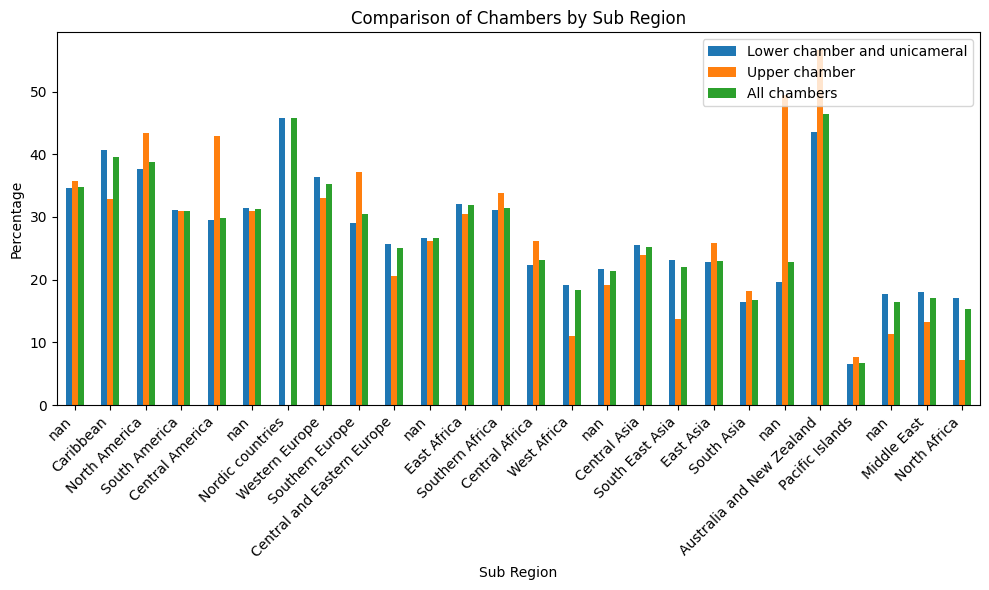

In [30]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='bar', x='Sub region', y=['Lower chamber and unicameral', 'Upper chamber', 'All chambers'], ax=ax)
plt.xlabel('Sub Region')
plt.ylabel('Percentage')
plt.title('Comparison of Chambers by Sub Region')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [33]:
# Filter only main regions
main_regions = ['Americas', 'Europe', 'Sub-Saharan Africa', 'Asia', 'Pacific', 'Middle East and North Africa']
filtered_df = df[df['Sub region'].isna() & df['Region'].isin(main_regions)]



In [34]:
filtered_df

,Region,Sub region,Lower chamber and unicameral,Upper chamber,All chambers,Region/Sub region
0,Americas,NaN,34.6,35.7,34.8,Americas
5,Europe,NaN,31.4,30.9,31.3,Europe
10,Sub-Saharan Africa,NaN,26.7,26.1,26.6,Sub-Saharan Africa
15,Asia,NaN,21.7,19.2,21.4,Asia
20,Pacific,NaN,19.7,49.4,22.8,Pacific
23,Middle East and North Africa,NaN,17.7,11.3,16.4,Middle East and North Africa


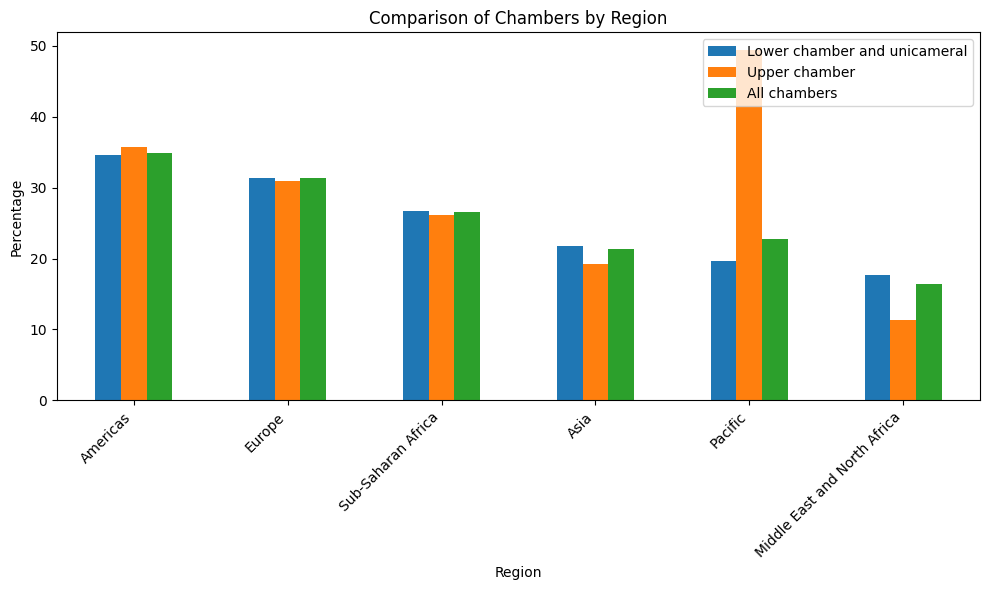

In [35]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
filtered_df.plot(kind='bar', x='Region', y=['Lower chamber and unicameral', 'Upper chamber', 'All chambers'], ax=ax)
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Comparison of Chambers by Region')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()